Regularize a 2D mesh
===

TODO: We will need to use a p-norm or a mapping projecting for surfaces embedded in 3D spaces, however, the basic concept shown here for 2-norms already works very well in the plane. (Alternatively look at volume preservation methods)

In [1]:
# Imports and physical parameters
# Imports and physical parameters
import numpy as np
import scipy
#from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage import data, io
import sys
import skimage
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
%matplotlib notebook

from ddgclib import *
from hyperct import Complex
#from ddgclib.curvatures import plot_surface, curvature

# Colour scheme for surfaces
db = np.array([129, 160, 189]) / 255  # Dark blue
lb = np.array([176, 206, 234]) / 255  # Light blue

# Parameters for a water droplet in air at standard laboratory conditions
#gamma = 0.0728  # N/m, surface tension of water at 20 deg C
gamma =71.03e-3  # N/m kg/s^2 = N m-1 surface tension of water used in SE
V = 0.02962  # Volume (0units unknown (mL?) 0.01 mL = 0.01 cm^3)
rho = 998   # kg/m3, density
g = 9.81  # m/s2
# Capillary rise parameters
theta_p = 69.4  * np.pi /180.0

#from ddgclib.curvatures import plot_surface, curvature

# Colour scheme for surfaces
db = np.array([129, 160, 189]) / 255  # Dark blue
lb = np.array([176, 206, 234]) / 255  # Light blue


#!conda install --yes --prefix {sys.prefix} skimage



In [24]:
def regularize(HC, bV, tau_i=1e-1):
    """
    TODO: We need a solution for when the mesh has already degenerated 
          and np.min([minVn_norm, tau_glob]) = 0.0
    """
    V = set(HC.V) - bV
    f = []
    for v in V:
        f.append(v.x_a)
        
    f = np.array(f)
    V_corr = []
    tau_glob = np.inf
    for i, v in enumerate(V):
        Vn = []
        for vn in v.nn:
            Vn.append(vn.x_a - v.x_a)
        Vn = np.array(Vn)
        Vn_norm = np.linalg.norm(Vn, axis=1)
        maxVn_norm = np.max(np.linalg.norm(Vn, axis=1))
        minVn_norm = np.min(np.linalg.norm(Vn, axis=1))
        tau_glob = np.min([minVn_norm, tau_glob])
        meanvn_norm = np.mean(Vn_norm)
        v_corr = np.zeros_like(Vn[0])
        for vn, vn_norm in zip(Vn, Vn_norm):
            #print(f'v_corr = {v_corr}')
            if vn_norm >= meanvn_norm:
                c = minVn_norm - vn_norm
            else:
                c = maxVn_norm - vn_norm

            #print(f'c ={c}')
            v_corr = v_corr - c * vn
            #df[i] += 100 *c * vn

        np.sum(v_corr, axis=-1)    
        V_corr.append(v_corr)
    
    tau = tau_glob
    V_corr = np.array(V_corr)
    df = V_corr
    f_k = f + tau * df
    for i, v in enumerate(V):
        #print(f'f_k[i] = {f_k[i]}')
        HC.V.move(HC.V[tuple(v.x_a)], tuple(f_k[i]))
        
    return HC

C:\Users\Endres\Desktop\iwt-projects\ddg\ddgclib\_complex.py:3751: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(<Figure size 432x288 with 1 Axes>,
 None,
 None)

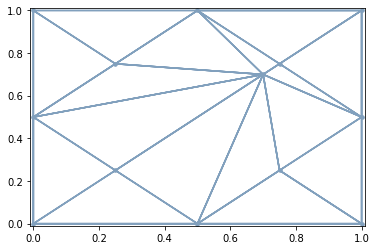

In [25]:
HC = Complex(2, domain=[(0, 1),]*2)
HC.triangulate()

for i in range(1):
    HC.refine_all()
    
bV = set()
for v in HC.V:
    if np.any(v.x_a == 0.0) or np.any(v.x_a == 1.0):
        bV.add(v)
        #print(f'bV = {bV}')
    else:
        continue
        
HC.V.move(HC.V[tuple([0.5, 0.5])], (0.7, 0.7))

HC.plot_complex(contour_plot=0, surface_plot=0, surface_field_plot=0,
    point_color=db, line_color=db, complex_color_f=lb, complex_color_e=db)

C:\Users\Endres\Desktop\iwt-projects\ddg\ddgclib\_complex.py:3751: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(<Figure size 432x288 with 1 Axes>,
 None,
 None)

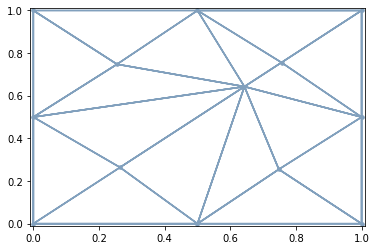

In [29]:
HC = Complex(2, domain=[(0, 1),]*2)
HC.triangulate()

for i in range(1):
    HC.refine_all()
    
bV = set()
for v in HC.V:
    if np.any(v.x_a == 0.0) or np.any(v.x_a == 1.0):
        bV.add(v)
        #print(f'bV = {bV}')
    else:
        continue
        
HC = Complex(2, domain=[(0, 1),]*2)
HC.triangulate()

for i in range(1):
    HC.refine_all()
    
bV = set()
for v in HC.V:
    if np.any(v.x_a == 0.0) or np.any(v.x_a == 1.0):
        bV.add(v)
        #print(f'bV = {bV}')
    else:
        continue
        
HC.V.move(HC.V[tuple([0.5, 0.5])], (0.7, 0.7))

for i in range(1):
    HC = regularize(HC, bV, tau_i=1e-1)
    
HC.plot_complex(contour_plot=0, surface_plot=0, surface_field_plot=0,
    point_color=db, line_color=db, complex_color_f=lb, complex_color_e=db)


C:\Users\Endres\Desktop\iwt-projects\ddg\ddgclib\_complex.py:3751: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(<Figure size 432x288 with 1 Axes>,
 None,
 None)

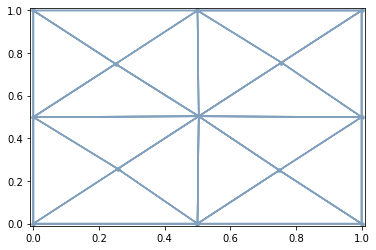

In [32]:
HC = Complex(2, domain=[(0, 1),]*2)
HC.triangulate()

for i in range(1):
    HC.refine_all()
    
bV = set()
for v in HC.V:
    if np.any(v.x_a == 0.0) or np.any(v.x_a == 1.0):
        bV.add(v)
        #print(f'bV = {bV}')
    else:
        continue
        
HC = Complex(2, domain=[(0, 1),]*2)
HC.triangulate()

for i in range(1):
    HC.refine_all()
    
bV = set()
for v in HC.V:
    if np.any(v.x_a == 0.0) or np.any(v.x_a == 1.0):
        bV.add(v)
        #print(f'bV = {bV}')
    else:
        continue
        
HC.V.move(HC.V[tuple([0.5, 0.5])], (0.7, 0.7))

for i in range(7):
    HC = regularize(HC, bV, tau_i=1e-1)
    
HC.plot_complex(contour_plot=0, surface_plot=0, surface_field_plot=0,
    point_color=db, line_color=db, complex_color_f=lb, complex_color_e=db)
